# 面向对象封装案例 I
## 小明爱跑步


In [17]:
class Person:
    
    def __init__(self,name,weight):
        #self.属性 = 形参
        self.name = name
        self.weight = weight
        
    def __str__(self):
        return "我的名字是%s 体重是 %.2f 公斤" %(self.name,self.weight)
    
    def run(self):
        print("%s小明爱跑步，跑步锻炼身体"%self.name)
        self.weight -= 0.5
    
    def eat(self):
        print("%s吃一顿"%self.name)
        self.weight += 1
        

xiaoming = Person("小明",75)
xiaoming.eat()
xiaoming.run()
print(xiaoming.weight)
xiaoming.__str__()

小明吃一顿
小明小明爱跑步，跑步锻炼身体
75.5


'我的名字是小明 体重是 75.50 公斤'

## 摆放家具
**需求**

1. **房子(House)** 有 **户型**、**总面积** 和 **家具名称列表**
    * 新房子没有任何的家具
2. **家具(HouseItem)** 有 **名字** 和 **占地面积**，其中
    *  **席梦思(bed)** 占地 `4` 平米
    *  **衣柜(chest)** 占地 `2` 平米
    *  **餐桌(table)** 占地 `1.5` 平米
3. 将以上三件 **家具** **添加** 到 **房子** 中
4. 打印房子时，要求输出：**户型**、**总面积**、**剩余面积**、**家具名称列表**

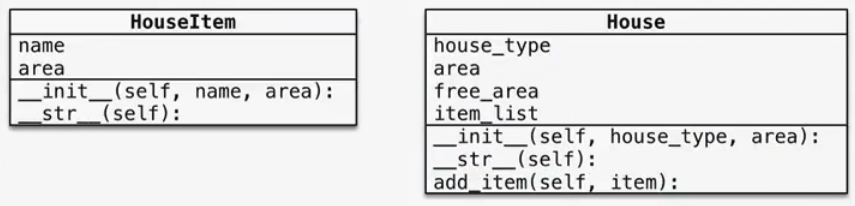

**剩余面积**

1. 在创建房子对象时，定义一个 **剩余面积的属性**，**初始值和总面积相等**
2. 当调用 `add_item` 方法，向房间 **添加家具** 时，让 **剩余面积** -= **家具面积**

**思考**：应该先开发哪一个类？

**答案** —— **家具类**

1. 家具简单
2. 房子要使用到家具，**被使用的类**，通常应该先开发

### 家具类

In [8]:
class HouseItem:
    
    def __init__(self,name,area):
        
        self.name = name
        self.area = area
        
    def __str__(self):
        return "%s 占地%2.f平米"%(self.name,self.area)
    
bed = HouseItem("席梦思",4)
chest = HouseItem("衣柜",2)
table = HouseItem("餐桌",1.5)

print(bed)
print(chest)
print(table)

席梦思 占地 4平米
衣柜 占地 2平米
餐桌 占地 2平米


### 房子类

In [25]:
class House:
    
    def __init__(self,house_type,area):
        self.house_type = house_type
        self.area = area
        #剩余面积,不需要额外定义形参
        self.free_area = area
        #家具列表
        self.item_list = []
        
    def __str__(self):
        return ("户型%s\n总面积：%.2f [剩余：%.2f]\n家具：%s"
                %(self.house_type,self.area,
                  self.free_area,self.item_list))
    
    def add_item(self,item):
        print("要添加%s"%item)
        

In [20]:
#创建房子对象
my_house = House("两室一厅",60)
print(my_house)
# my_house.add_item(bed.name)

户型两室一厅
总面积：60.00 [剩余：60.00]
家具：[]


## 添加家具
**需求**

* 1> **判断** **家具的面积** 是否 **超过剩余面积**，**如果超过**，提示不能添加这件家具
* 2> 将 **家具的名称** 追加到 **家具名称列表** 中
* 3> 用 **房子的剩余面积** - **家具面积**

In [39]:
class House:
    
    def __init__(self,house_type,area):
        self.house_type = house_type
        self.area = area
        #剩余面积,不需要额外定义形参
        self.free_area = area
        #家具列表
        self.item_list = []
        
    def __str__(self):
        return ("户型%s\n总面积：%.2f [剩余：%.2f]\n家具：%s"
                %(self.house_type,self.area,
                  self.free_area,self.item_list))
    
    def add_item(self,item):
        print("要添加%s"%item)
        #1.判断家具的面积
        if item.area > self.free_area:
            print("%s的面积太大了无法添加"%item.name)
            return
        #2.将家具的名称添加到列表中
        self.item_list.append(item.name)
        #3.计算剩余面积
        self.free_area -= item.area

In [42]:
bed = HouseItem("席梦思",4)
chest = HouseItem("衣柜",2)
table = HouseItem("餐桌",1.5)

#创建房子对象
my_house = House("两室一厅",60)
my_house.add_item(bed)
print(my_house)
my_house.add_item(chest)
print(my_house)

要添加席梦思 占地 4平米
户型两室一厅
总面积：60.00 [剩余：56.00]
家具：['席梦思']
要添加衣柜 占地 2平米
户型两室一厅
总面积：60.00 [剩余：54.00]
家具：['席梦思', '衣柜']


# 面向对象封装案例 II

## 目标

* 士兵突击案例
* 身份运算符

**封装**

1. **封装** 是面向对象编程的一大特点
2. 面向对象编程的 **第一步** —— 将 **属性** 和 **方法** **封装** 到一个抽象的 **类** 中
3. **外界** 使用 **类** 创建 **对象**，然后 **让对象调用方法**
4. **对象方法的细节** 都被 **封装** 在 **类的内部**

> 一个对象的 **属性** 可以是 **另外一个类创建的对象**

## 01. 士兵突击

**需求**

1. **士兵** **许三多** 有一把 **AK47**
2. **士兵** 可以 **开火**
3. **枪** 能够 **发射** 子弹
4. **枪** 装填 **装填子弹** —— **增加子弹数量**


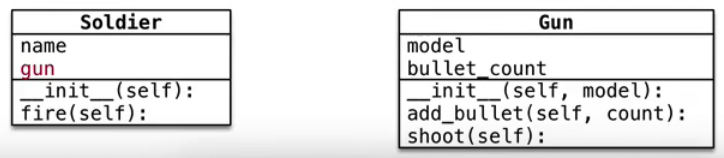
### 1.1 开发枪类

**`shoot` 方法需求**

* 1> 判断是否有子弹，没有子弹无法射击
* 2> 使用 `print` 提示射击，并且输出子弹数量


In [18]:
class Gun:
    
    def __init__(self,model):
        
        #1.枪的型号
        self.model = model
        
        #2.子弹数量
        self.bullet_count = 0
        
    def add_bullet(self,count):
        self.bullet_count += count
        
    def shoot(self):
        
        # 1.判断子弹数量
        if self.bullet_count <= 0:
            print("[%s]没有子弹了..."%self.model)
            return
        # 2. 发射子弹，-1
        self.bullet_count -= 1
        
        # 3.提示发射子弹
        print("[%s]发射[%d]"%(self.model,self.bullet_count))

In [19]:
Ak47 = Gun('ak47')
Ak47.add_bullet(5)
Ak47.shoot()

[ak47]发射[4]


### 1.2 开发士兵类

> 假设：每一个新兵 都 **没有枪**

**定义没有初始值的属性**

在定义属性时，如果 **不知道设置什么初始值**，可以设置为 `None`

* `None` **关键字** 表示 **什么都没有**
* 表示一个 **空对象**，**没有方法和属性，是一个特殊的常量**
* 可以将 `None` 赋值给任何一个变量

**`fire` 方法需求**

* 1> 判断是否有枪，没有枪没法冲锋
* 2> 喊一声口号
* 3> 装填子弹
* 4> 射击

In [23]:
class Soldier:
    
    def __init__(self,name):
        
        # 1. name 
        self.name = name
        
        # 2.gun - fresh soldier don't have gun
        self.gun = None
    
    def fire(self):
        
        # 1.judge whether soldier have gun 
        if self.gun is None:
            print("[%s]还没有枪..."%self.name)
            return
        # 2. slogen
        print("冲啊...[%s]"%self.name)
        
        # 3. 让枪装子弹
        self.gun.add_bullet(50)
        
        # 4.让枪发射子弹
        self.gun.shoot()
        
    
        

In [42]:
xvsanduo = Soldier('xvsanduo')

xvsanduo.gun = Ak47  #Ak47也是一个对象
xvsanduo.fire()

冲啊...[xvsanduo]
[ak47]发射[984]


**小结**

1. 创建了一个 **士兵类**，使用到 `__init__` 内置方法
2. 在定义属性时，如果 **不知道设置什么初始值**，可以设置为 `None`
3. 在 **封装的** 方法内部，还可以让 **自己的** **使用其他类创建的对象属性** 调用已经 **封装好的方法** 

## 02. 身份运算符

身份运算符用于 **比较** 两个对象的 **内存地址** 是否一致 —— **是否是对同一个对象的引用**

* 在 `Python` 中针对 `None` 比较时，建议使用 `is` 判断

| 运算符 | 描述 | 实例 |
| --- | --- | --- |
| is | is 是判断两个标识符是不是引用同一个对象 | x is y，类似 id(x) == id(y) |
| is not | is not 是判断两个标识符是不是引用不同对象 | x is not y，类似 id(a) != id(b) |

### is 与 == 区别：

`is` 用于判断 **两个变量 引用对象是否为同一个**   
`==` 用于判断 **引用变量的值** 是否相等

```python
>>> a = [1, 2, 3]
>>> b = [1, 2, 3]
>>> b is a 
False
>>> b == a
True
```
